<a href="https://colab.research.google.com/github/Xboster-eliel/alcantarillado/blob/main/Taller_Parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from tabulate import tabulate

In [ ]:
def round_up(n):
  return math.ceil(n)

def round_up(n, decimals=0):
  multiplier = 10 ** decimals
  return math.ceil(n * multiplier) / multiplier

print(round_up(0.62, 1))
print(round_up(0.62))

g= 9.81    #m/s**2    gravedad

0.7
1.0


# Pregunta 1

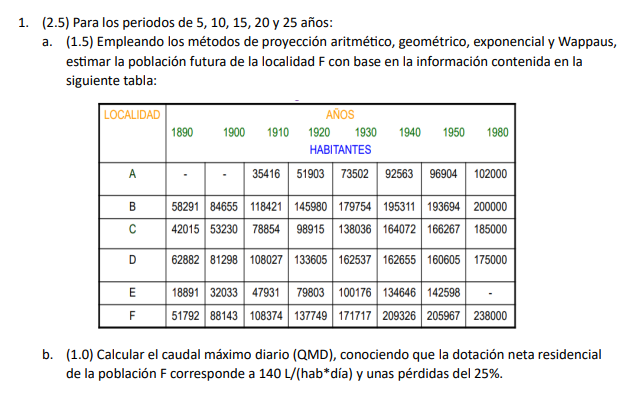

## Codigo

In [ ]:
P = []
P.append(float(input(f"Ingresa la Población Ultimo Censo: ")))
P.append(float(input(f"Ingresa la Población al Inicio del Censo: ")))
P.append(float(input(f"Ingresa la Población del Censo Anterior (al ultimo censo): ")))

T = []
T.append(float(input(f"Ingresa el Periodo Ultimo Censo: ")))
T.append(float(input(f"Ingresa el Periodo al Inicio del Censo: ")))
T.append(float(input(f"Ingresa el Periodo del Censo Anterior (al ultimo censo): ")))

Ingresa la Población Ultimo Censo: 238000
Ingresa la Población al Inicio del Censo: 51792
Ingresa la Población del Censo Anterior (al ultimo censo): 205967
Ingresa el Periodo Ultimo Censo: 1980
Ingresa el Periodo al Inicio del Censo: 1890
Ingresa el Periodo del Censo Anterior (al ultimo censo): 1950


Tabla de resultados

  Años    Aritmético    Geométrico    Exponencial    Wappaus
------  ------------  ------------  -------------  ---------
  1985        248345        259043         243804     270152
  1990        258690        281947         249749     310330
  1995        269035        306876         255839     361965
  2000        279380        334009         262078     430775
  2005        289724        363541         268468     527037


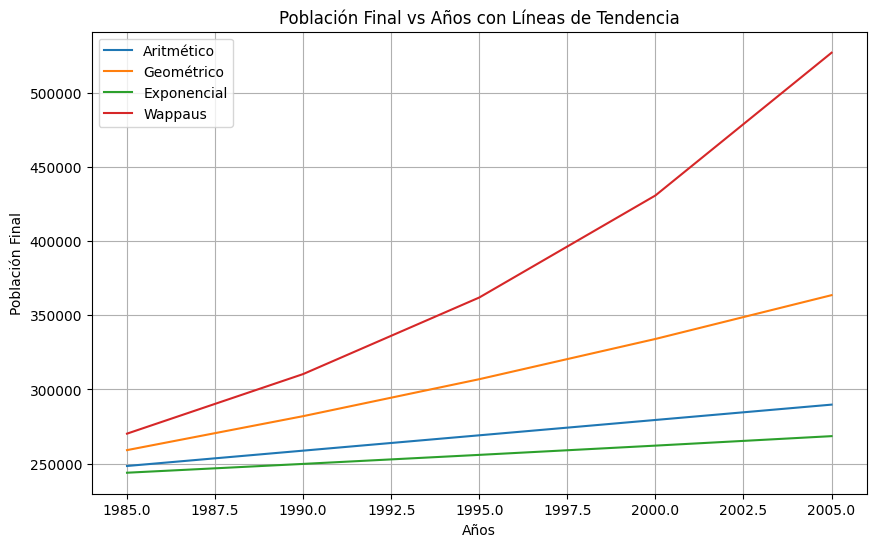

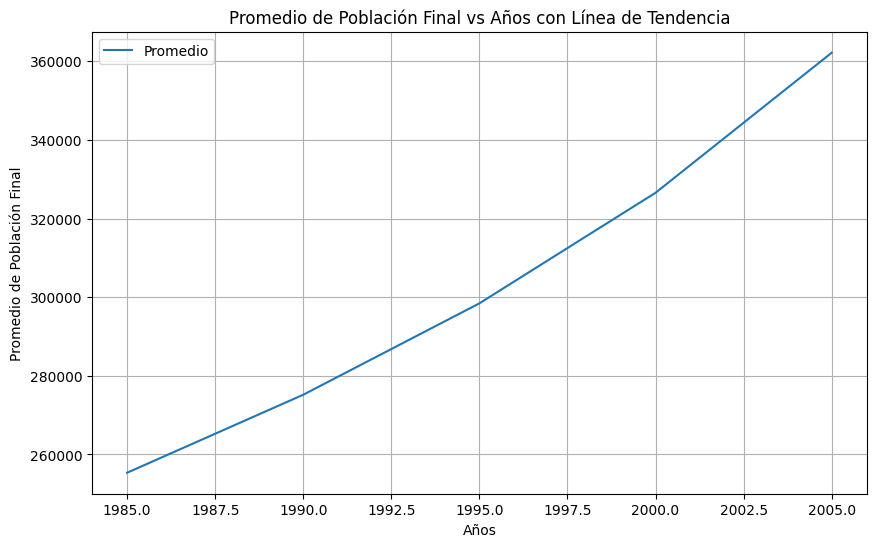

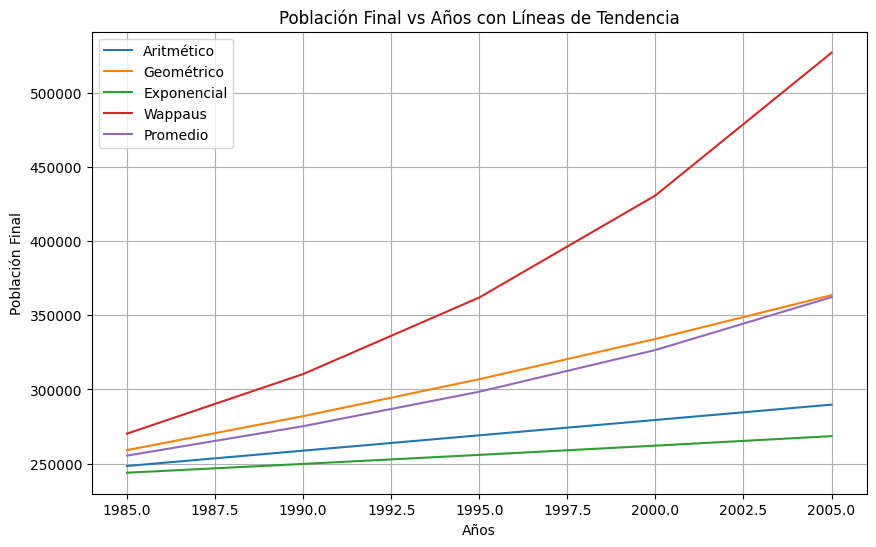

In [ ]:
def metodo_aritmetico(Puc, Tuc, Pci, Tci, Tf):
    return Puc + (Puc - Pci) / (Tuc - Tci) * (Tf - Tuc)

def metodo_geometrico(Puc, Tuc, Pci, Tci, Tf):
    r = ((Puc / Pci) ** (1 / (Tuc - Tci))) - 1
    return Puc * (1 + r) ** (Tf - Tuc)

def metodo_exponencial(Pci, Tci, Pca, Tca, Tf):
    k = math.log(Pci / Pca) / (Tci - Tca)
    return Pci * math.exp(k * (Tf - Tci))

def metodo_wappaus(Puc, Tuc, Pci, Tci, Tf):
    i = (200 * (Puc - Pci)) / ((Tuc - Tci) * (Pci + Puc))
    if (i * (Tf - Tci)) < 200:
        return Pci*((200 + i * (Tf - Tci)) / (200 - i * (Tf - Tci)))
    else:
        return None

def calcular_Pf_cada_5_anios(P, T, Tf_inicial, Tf_final):
    resultados = []
    for Tf in range(Tf_inicial, Tf_final + 1, 5):
        Pf_aritmetico = metodo_aritmetico(P[0], T[0], P[1], T[1], Tf)
        Pf_geometrico = metodo_geometrico(P[0], T[0], P[1], T[1], Tf)
        Pf_exponencial = metodo_exponencial(P[0], T[0], P[2], T[2], Tf)
        Pf_wappaus = metodo_wappaus(P[0], T[0], P[1], T[1], Tf)
        resultados.append([Tf, Pf_aritmetico, Pf_geometrico, Pf_exponencial, Pf_wappaus])
    return resultados

##################################################################################################################################################################################################

# Años iniciales y finales para el cálculo de Pf
Tf_inicial = 1985
Tf_final = 2005

# Cálculo de Pf cada 5 años
resultados = calcular_Pf_cada_5_anios(P, T, Tf_inicial, Tf_final)

########## Tabla ###############
# Tabla de resultados
tabla = [['Años', 'Aritmético', 'Geométrico', 'Exponencial', 'Wappaus']]

for i in resultados:
    tabla.append(i)

print("Tabla de resultados")
print()
print(tabulate(tabla, headers='firstrow'))

#####################################################################################################################################################################

########## Grafico 1 ###############
años = [e[0] for e in resultados]
poblacion_aritmetico = [e[1] for e in resultados]
poblacion_geometrico = [e[2] for e in resultados]
poblacion_exponencial = [e[3] for e in resultados]
poblacion_wappaus = [e[4] for e in resultados]

plt.figure(figsize=(10, 6))
plt.plot(años, poblacion_aritmetico, label='Aritmético')
plt.plot(años, poblacion_geometrico, label='Geométrico')
plt.plot(años, poblacion_exponencial, label='Exponencial')
plt.plot(años, poblacion_wappaus, label='Wappaus')

plt.xlabel('Años')
plt.ylabel('Población Final')
plt.title('Población Final vs Años con Líneas de Tendencia')
plt.legend()
plt.grid(True)
plt.show()

########## Grafico 2 ###############
años = [e[0] for e in resultados]
poblaciones = np.array(resultados)[:, 1:]
promedio_poblaciones = np.mean(poblaciones, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(años, promedio_poblaciones, label='Promedio')

plt.xlabel('Años')
plt.ylabel('Promedio de Población Final')
plt.title('Promedio de Población Final vs Años con Línea de Tendencia')
plt.legend()
plt.grid(True)
plt.show()

########## Grafico 3 ###############
años = [i[0] for i in resultados]
poblacion_aritmetico = [i[1] for i in resultados]
poblacion_geometrico = [i[2] for i in resultados]
poblacion_exponencial = [i[3] for i in resultados]
poblacion_wappaus = [i[4] for i in resultados]
poblaciones = np.array(resultados)[:, 1:]

plt.figure(figsize=(10, 6))
plt.plot(años, poblacion_aritmetico, label='Aritmético')
plt.plot(años, poblacion_geometrico, label='Geométrico')
plt.plot(años, poblacion_exponencial, label='Exponencial')
plt.plot(años, poblacion_wappaus, label='Wappaus')
plt.plot(años, promedio_poblaciones, label='Promedio')

plt.xlabel('Años')
plt.ylabel('Población Final')
plt.title('Población Final vs Años con Líneas de Tendencia')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
Dneta = float(input(f"Dotacion neta "))
Perdidas = float(input(f"Perdidas "))

Dotacion neta 140
Perdidas 0.25


In [ ]:
k1 = 0
k2= 0

#####################################################################################################################################################################

if promedio_poblaciones.any() >= 12500:
  k1 = 1.3
  k2 = 1.2
else:
  k1 = 1.2
  k2 = 1.5

#####################################################################################################################################################################

Dbruta= Dneta / (1-Perdidas)         #litros/(hab/dia)  "dotacion bruta "

Qmd= Dbruta*promedio_poblaciones     #litros/dias   "caudal medio diario "
Qmd= np.round(Qmd/1000/86400,2)      #m**3/segundo

QMD=  np.round(Qmd*k1,2)             #m**3/segundo "caudal maximo diario "
QMH=  np.round(QMD*k2,2)              #m**3/segundo "caudal medio Horario "

print(Dbruta, Qmd,QMD,QMH)

186.66666666666666 [0.55 0.59 0.64 0.71 0.78] [0.66 0.71 0.77 0.85 0.94] [0.99 1.06 1.16 1.27 1.41]


## Resultados

In [ ]:
print("Tabla de resultados")
print()
print(tabulate(tabla, headers='firstrow'))

Tabla de resultados

  Años    Aritmético    Geométrico    Exponencial    Wappaus
------  ------------  ------------  -------------  ---------
  1985        248345        259043         243804     270152
  1990        258690        281947         249749     310330
  1995        269035        306876         255839     361965
  2000        279380        334009         262078     430775
  2005        289724        363541         268468     527037


In [ ]:
print(Dbruta, Qmd,QMD,QMH)

186.66666666666666 [0.55 0.59 0.64 0.71 0.78] [0.66 0.71 0.77 0.85 0.94] [0.99 1.06 1.16 1.27 1.41]


# Pregunta 2

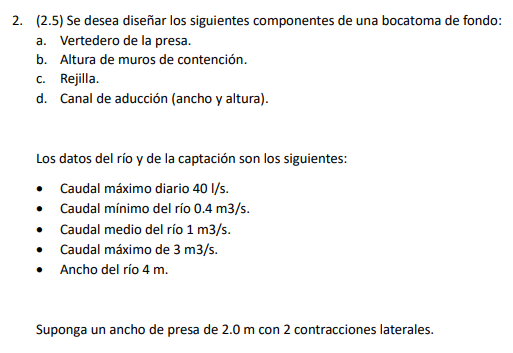

## Codigo

In [ ]:
QMD= 40               #l/s   Cuadal maximo diario
Q= QMD/1000         #m**3/s  Caudal de diseño
Qrio= [0.4, 1, 3]   #m**3/s   Caudal del rio [minimo,medio,maximo]
QMrio= Qrio[2]        #m**3/s

ancho_rio= 4           #m
ancho_presa= 2         #m

################# PRESA ##################

bl= 0.1              #borde libre recomendado para ancho de la presa
BL= 0.3              #borde libre recomendado para altura presa
BL_p= 0.15           #borde libre recomendado para el canal de aduccion

################# REGILLA ##################

regilla= 0.0191         #m   ->  3/4"
l= 2                    #m longitud de la lamina de agua producto de las contracciones (perfil frente)
n= 2                    #  Numero de contracciones laterales (perfil frente)
vb= 0.2                 #m/s Velociad entre barrotes

################# CANAL DE ADUCCION ##################

k= 0.9                   # para flujo paralelo al pasar por los barrotes (sin interrumpcion)
a= 0.05                  #m Separacion entre barrotes
b= regilla

i= 3                     # pendiente
i= i/100


In [ ]:
if QMrio < Q and ancho_presa > ancho_rio:
  print("Estas mal; 'No puedes explotar mas de lo que se puede' \n 'Nunca el ancho rio < ancho presa")

if vb <= 0.2:
  vb=0.2
else:
  vb=vb

In [ ]:
########################################################## DISEÑO DE LA PRESA ##########################################################

hmuro= ((QMrio/(1.84*l))**(2/3))     #m Altura de muro sin borde libre
hmuro_bl = round(hmuro + BL)         #m  Para el Qmax que pueda tener el rio

hr= ((Q)/(1.84*l))**(2/3)            #m altura de la lamina de agua sobre la presa ; Altura de Rio/Diseño

l_prima= l - 0.1*n*hr                #m

vr= Q/(l_prima*hr)                   #m/2  Velocidad del Rio/Diseño

#############################################################

if 0.3 < vr < 3:
  print("\n'Estas bien', la velocidad de diseño es eficiente")
else:
  print("\n'Estas mal', la velocidad de diseño es ineficiente")

############################################## REGILLA #######################################################################################################################

B= 0.4                            #ancho de la regilla
area_neta= Q/(k*vb)               #m**2 area neta de la regilla
area_neta= round(area_neta,2)
lr= (area_neta*(a+b))/(a*B)       #m   Longitud de la regilla
lr= round_up(lr,1)

area_total= lr*B                #m**2  area bruta de la regilla
area_total= round_up(area_total,2)
N= area_total/(B*(a+b))        # Cantidad de separacion entre barras
N= int(round_up(N))
lr_real= (a+b)*N                #m
lr_real= round_up(lr_real,2)

######################################################

if lr >= 0.7:
  print('longitud de la regilla valida')
  lr=lr
else:
  print('longitud de la regilla invalida')
  lr=0.7

if B >= 0.4:
  print('ancho de la regilla valida')
  B=B
else:
  print('ancho de la regilla invalida')
  B=0.7

############################################## CANAL DE ADUCCION  #######################################################################################################################

xs= 0.36*vr**(2/3)+0.6*hr**(4/7)      #m alcance filo superior
xi= 0.18*vr**(4/7)+0.74*hr**(3/4)     #m alcance filo inferior
B= xs+bl                              #m ancho Canal de aduccion
B= round(B,1)

lc= lr_real+ i                        #m Longitud de regilla y muro

he= (Q**2/(g*B**2))**(1/3)
he= round_up(he,3)                        #Fin    #m Profundidad aguas abajo

ho= ((2*he**2)+(he-(i*lc)/3)**2)**(1/2) - ((2*i*lc)/3)   #Inicio #m Profundidad aguas arriba
ho = round_up(ho,3)

Ho= ho + BL_p
Ho= round(Ho,3)


ve= Q/(he*B)                                               #m/s Velocidad aguas abajo
ve= round_up(ve,2)

##########################################################

if 0.3 < ve < 3:
  print("'Estas bien', la velocidad de diseño es eficiente")
else:
  print("'Estas mal', la velocidad de diseño es ineficiente")

#####################################################################################################################################################################




'Estas bien', la velocidad de diseño es eficiente
longitud de la regilla valida
ancho de la regilla valida
'Estas bien', la velocidad de diseño es eficiente


## Resultados

In [ ]:
print(f"\n hmuro={round(hmuro_bl,2)} [m] | hr={round(hr,3)} [m] | L'={round(l_prima)} [m]  | vr={round(vr,2)} [m/s] | xs={round(xs,2)} [m] | Ancho_Canal_aduccion={B} [m] ")


 hmuro=1 [m] | hr=0.049 [m] | L'=2 [m]  | vr=0.41 [m/s] | xs=0.31 [m] | Ancho_Canal_aduccion=0.4 [m] 


In [ ]:
print(f"\n area_neta={area_neta} [m**2] | Longitud_regilla={lr} [m] | area_total={area_total} [m**2] | Longitud_real={lr_real} [m] | N={N} [-]")


 area_neta=0.22 [m**2] | Longitud_regilla=0.8 [m] | area_total=0.33 [m**2] | Longitud_real=0.83 [m] | N=12 [-]


In [ ]:
print(f"\n longitud(regila & muro) => lc={lc} [m] | Profundidad aguas abajo => he={he} [m] | Profundidad aguas arriba => ho={ho} [m] | Ho={Ho} [m] | Velocidad aguas abajo => ve={ve} [m/s]")



 longitud(regila & muro) => lc=0.86 [m] | Profundidad aguas abajo => he=0.101 [m] | Profundidad aguas arriba => ho=0.153 [m] | Ho=0.303 [m] | Velocidad aguas abajo => ve=1.0 [m/s]
